<div style="border:solid green 2px; padding: 20px">
<b>Ирина, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование данных о российском кинопрокате



## Введение

### Постановка задачи

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Отдельно проанализировать фильмы, которые получили гос. поддержку. Определить популярность этих фильмов у зрителей  

Закзачик: Министерство культуры Российской Федерации.

### Этапы выполнения проекта

1. Объединить в 1 таблицу файлы с данными о прокатных удостоверениях и о прокате в кинотеатрах России.
2. Обработать данные (проанализировать типа данных, пропуски, дубликаты)
3. Изучить отдельные некоторые столбцы данных
4. Провести общий исследовательский анализ данных 
5. Исследовать фильмы, получившие гос. поддержку

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

## Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 20)
pd.set_option("display.float_format", "{:.2f}".format)
# pd.options.mode.chained_assignment = None

#Читаем данные из файла
df1 = pd.read_csv('/datasets/mkrf_movies.csv')
df2 = pd.read_csv('/datasets/mkrf_shows.csv')


In [5]:
#Объединим данные из 2 таблиц 
df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors='coerce') # избавляемся от текстового поля 
df1['puNumber'] = df1['puNumber'].astype('Int64') # приравниваем тип данных общего столбца 
df2['puNumber'] = df2['puNumber'].astype('Int64')

data = df1.merge(df2, on='puNumber', how='left')

## Предобработка данных

### Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [6]:
# Преобразуем дату
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')

# Преобразуем в целое
type_list = ['refundable_support', 'nonrefundable_support', 'budget']
for tp in type_list:
    data[tp] = data[tp].astype('Int64')

# Преобразуем в число с плавующей точкой
data['ratings'] = data['ratings'].astype('str')
proc = data.query('ratings.str.contains("%")').copy()
proc['ratings'] = proc['ratings'].str.replace('%','').astype('int') / 10
data['ratings'].update(proc['ratings'])
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   Int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    Int64              
 10  nonrefundable_support  332 non-null    Int64              
 11  budget                 332 non-null    Int64            

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ заменить тип данных внутри датасета с помощью цикла `for` 👍 
</div>

Изменены типы данных в следующий столбцах:
1. show_start_date. Теперь имеет тип данных DataTime
2. refundable_support, nonrefundable_support, budget теперь имеет тип данных int. Так как данные по этим столбцам не имеют дробной части.
3. ratings теперь имеет тип данных float. Для того, чтобы преобразовать это поле необходимо было привести все значения в столбце к одному виду. Для этого пришлось отбросить % и разделить значения на 10.

### Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

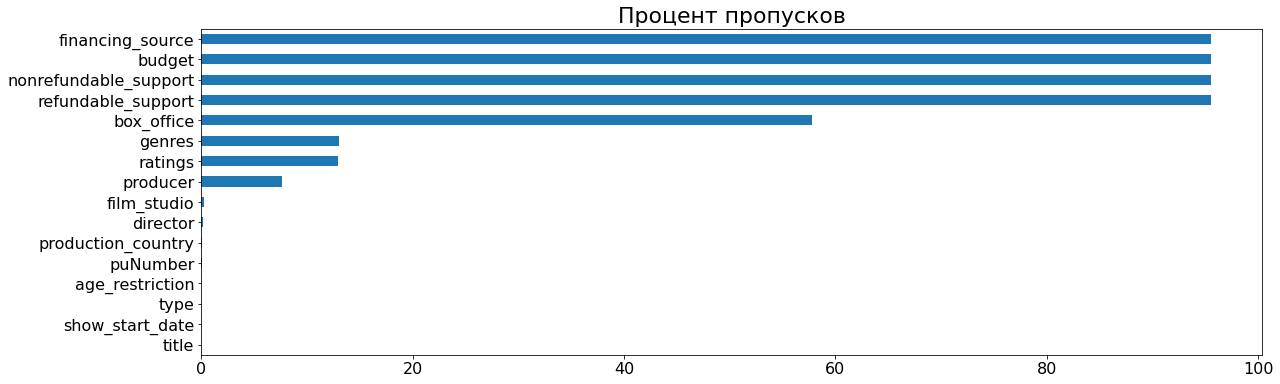

In [7]:
#изучим процент пропусков в каждом столбце относительно полного датасета
((data.isna().mean()*100)
 .to_frame()
 .rename(columns = {0:'nans'})
 .sort_values(by = 'nans', ascending = True)
 .plot(kind = 'barh', figsize = (19,6), fontsize = 16, legend = False)
 .set_title('Процент пропусков', fontsize = 22));

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Хороший способ визуализировать доли пропущенных значений 👍
    
</div>

#### Пропуски в столбце puNumber

In [8]:
data.loc[data['puNumber'].isna()]
data = data.dropna(subset=['puNumber']) 

В этом столбце всего лишь один пропуск. Можно удалить это наблюдение, так как на анализ отсутствие этого наблюдения никак не повлияет.

#### Пропуски в столбце film_studio

In [9]:
data.loc[data['title'] == 'Stars in Shorts', 'film_studio'] = 'Biscuit Pictures, Contemptible Entertainment, Mission Filmworks'
data.loc[data['title'] == 'Мульт личности. Выпуск 5', 'film_studio'] = 'Пространство идей'
data.loc[data['title'] == 'Значит любит', 'film_studio'] = 'Pravda Films'
data.loc[data['title'] == 'Несейка. Младшая дочь', 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
data.loc[data['title'] == 'В плену города грёз', 'film_studio'] = 'Olga Michi Production'

list = ['Последнее фото', 'Мой селфхарм', 'Доживем до каникул?..', 'До и После', 'Мой папа Чингисхан', 'Обстоятельства места и времени', 'Брови', 'Топливо', 'Путешествие в Париж']
for i in list:
    data.loc[data['title'] == i, 'film_studio'] = 'Авторское кино'

# data.loc[data['film_studio'].isna()]

Всего поле содержит 18 попусков. Для 5 фильмов студию удалось найти в сети.

Фильмы "Доживем до каникул?..", "До и После", "Калмыцкий геше Нгаванг Вангьял", "Мой папа Чингисхан", "Обстоятельства места и времени", "Брови", "Топливо" и "Путешествие в Париж" - авторские фильмы. Для некоторых, по информации из сети, в графе студия написана фамилия режиссёра, поэтому эту графу у фильмов я заполнила как "Авторское кино"

Для фильмов "Ян Антонышев", "Эрик Булатов. Моя Третьяковка, серии 1-2" и "Калмыцкий геше Нгаванг Вангьял" вообще не нашла никакой информации в сети. оставила эти поля не заполненными.

#### Пропуски в столбце production_country

In [10]:
data.loc[data['production_country'].isna(), 'production_country'] = 'Россия'
# data.loc[data['production_country'].isna()]

Поле имеет всего 2 пропуска. Оба фильма ("Ералаш" и "Мультличности") производились в России.

#### Пропуски в столбце director

In [11]:
data.loc[data['title'] == 'Bon Jovi. The Circle Tour', 'director'] = 'Anthony M. Bongiovi'
data.loc[data['title'] == 'Мульт личности. Выпуск 5', 'director'] = 'Василий Пичул'

data.loc[data['director'].isna(),'director'] = '-'

#data.loc[data['director'].isna()]

Поле имеет всего 9 пропусков. В сети информацию о режиссёрах получилось найти только для 2 фильмов: "Bon Jovi. The Circle Tour" и "Мульт личности. Выпуск 5". Остальные считаются записанными концертами в театрах и видимо режиссёров не имеют, заполнила эти поля значением "-".

#### Пропуски в столбце producer

In [12]:
for country in ['СССР', 'Чехословакия', 'КНР']:
    data.loc[data['production_country'].str.contains(country), 'producer'] = '-'
# data.loc[data['production_country'].str.contains("СССР"), 'producer'] = '-'
# data.loc[data['production_country'].str.contains("Чехословакия"), 'producer'] = '-'
# data.loc[data['production_country'].str.contains("КНР"), 'producer'] = '-'
data.loc[data['producer'].isna(),'producer'] = 'unknown'

# data.loc[data['producer'].isna()]

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Хорошо, что используешь метод `loc` для манипуляций с данными 👍. Здесь также можно было бы использовать цикл `for` для автоматизации расчетов.
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️  </b>
    
Поправила.
    
</div>    

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

👍   
    
</div>

Поле имеет 568 пропусков. заполнила по следующему принципу. Из сети я узнала, что продюсирование фильмов зародилось только в 1991 году, следовательно фильмы, что сняты до этого времени продюсеров не имеют, по такой логике фильмы из СССР и Чехословакии не имеют продюсирования. Из КНР фильм также старый.

После такой обработки остаётся еще около 150 пропусков. из запомним строкой "unknown", так как заполнять вручную столько записей долгий и трудоёмкий процесс.

#### Пропуски в столбце ratings

In [13]:
data.loc[data['ratings'].isna(), 'ratings'] = -1
# data.loc[data['ratings'].isna()]

По какой-то причине у фильма в датасете нет рейтинга, это может быть как ошибка при выгрузке данных, так и отсутствие рейтинга у фильма (слишком мало голосов зрителей), следовательно необходимо заполнить поле цифровым аналогом слова неизвестно. Так как рейтинг всегда больше нуля, таким значением может быть -1

#### Пропуски в столбце genres

In [14]:
data.loc[data['genres'].isna(), 'genres'] = 'unknown'

Поле имеет почти 1000 пропусков. Следовательно, заполнить его вручную также трудоёмко. Причина появления пропусков на первый взгляд не понятна, поэтому я заполнила поле значением "unknown"

#### Пропуски в остальных столбцах

Поля refundable_support, nonrefundable_support, financing_source, budget содержат всего 332 наблюдения, это, исходя из описания датасета, фильмы с гос поддержкой, заполнить на их совании остальной датасет невозможно. Дополнительной информации для остальных фильмов будет найти долго и проблематично, я решила эти поля не заполнять.  
Поле box_office содержит информацию только для половины наблюдений. Заполнить это поле также невозможно без длительного пользования интернета, также решила это поле не заполнять.

### Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

#### Обработка дублей в столбце type

In [15]:
# Смотрим сколько всего уникальных значений в поле type
display(data['type'].nunique())
# при анализе списка уникальных значений, выявлены лишние пробелы
data['type'] = data['type'].str.replace(' ','')
display(data['type'].nunique())

8

6

#### Обработка дублей в столбце film_studio

Так как далее этот фактор нигде не используется и имеет огромное число разных вариантов - я решила тут дубликаты не убирать.
Тоже касается полей title, director и producer

#### Обработка дублей в столбце production_country

In [16]:
# Смотрим сколько всего уникальных значений в поле production_country
display(data['production_country'].nunique())
data['production_country'].unique()

# при анализе списка уникальных значений, прежде чем обрабатывать ошибки в написании необходимо убрать не корреткные символы
data['production_country'] = data['production_country'].str.replace(' ','')
data['production_country'] = data['production_country'].str.replace('-',',')
data['production_country'] = data['production_country'].str.replace(',,',',')

#теперь все в датасете страны разделены ",", тогда можно посмотреть сколько раз встречается каждая страна в каждой ячейке
# dict_countries = {}

# for prod_coun in data['production_country'].sort_values().unique():
#     countries = prod_coun.split(',')
#     for val in countries:
#         if val in dict_countries:
#             dict_countries[val] +=1
#         else:
#             dict_countries[val] =1
# Выводи список и смотрим ошибки
# for key, value in sorted(dict_countries.items()):
#     print("{}: {}".format(key, value))

#Формируем список ошибок
mist_count = {'2019': 'Германия',
              'CША': 'США',
              'Англия': 'Великобритания',
              'Багамскиеострова': 'Багамские острова',
              'Беларусь':'Белоруссия',
              'Бенльгия':'Бельгия',
              'Босния,Герцеговина':'Босния и Герцеговина',
              'БоснияиГерцеговина':'Босния и Герцеговина',
              'Германя':'Германия',
              'ЗападныйБерлин':'Западный Берлин',
              'Изриль':'Израиль',
              'К;анада':'Канада',
              'Каймановыострова':'Каймановы острова',
              'КняжествоАндорра':'Княжество Андорра',
              'Н.Зеландия':'Новая Зеландия',
              'НоваяЗеландия':'Новая Зеландия',
              'Норвения':'Норвегия',
              'ОбъединенныеАрабскиеЭмираты':'ОАЭ',
              'Порртугалия':'Португалия',
              'ПуэртоРико':'Пуэрто-Рико',
              'Пуэрто,Рико':'Пуэрто-Рико',
              'РеспубликаАрмения':'Армения',
              'РеспубликаБеларусь':'Белоруссия',
              'РеспубликаБелоруссия':'Белоруссия',
              'РеспубликаКазахстан':'Казахстан',
              'РеспубликаКипр':'Кипр',
              'РеспубликаКорея':'Корея',
              'РеспубликаУзбекистан':'Узбекистан',
              'СЩА':'США',
              'Сша':'США',
              'Фрация':'Франция',
              'ЧешскаяРеспублика':'Чехия',
              'Шри,Ланка':'Шри-Ланка',
              'Ю.Корея':'Южная Корея',
              'ЮжнаяКорея':'Южная Корея'
              }

for wrong, right in mist_count.items():
    data['production_country'] = data['production_country'].str.replace(wrong,right, regex = True)

display(data['production_country'].nunique())

950

798

#### Обработка дублей в остальных столбцах

Столбцы show_start_date, refundable_support, nonrefundable_support, financing_source, budget, ratings являются числовыми в них невозможно найти и исправить дубликаты.

Столбец puNumber хоть и является категориальным представляет собой набор чисел, определить ошибки в нем невозможно. 

Столбцы age_restriction и genres не имеют ошибок и дубликатов.
_________________________________________________________________________________________________________________________
Причины появления дубликатов точно только в том, что поля были заполнены разными пользователями без определенной методики заполнения, нет никакого однообразия.

### Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Категориальными значеями являются следующие переменные:
1. title
2. puNumber
3. type
4. film_studio
5. production_country
6. director
7. producer
8. age_restriction
9. genres

В столбцах type, production_country, age_restriction и genres после обработки дубликатов проблем нет.
Что касается столбцов title, film_studio, director и producer в них могут встречаться пробелы в начале и в конце строки, их можно удалить.

In [17]:
# Удаляю лишие пробелы в начале и конце строки
data['title'] = data['title'].str.strip()
data['film_studio'] = data['film_studio'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Оставил пример ниже, как оптимизировать можно этот расчет.
    
</div>

In [18]:
cols_to_strip = ['title', 'film_studio', 'director', 'producer']

for col2strip in cols_to_strip:
    data[col2strip] = data[col2strip].str.strip()

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️  </b>
    
Поняла.
    
</div>    

### Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [19]:
#найдём все данные при которых полный бюджет фильма меньше, чем сумма объёмов возвратных и невозвратных
# средств государственной поддержки
data.loc[data['budget']<data['refundable_support'] + data['nonrefundable_support']]

# видно, что таких полей не много и во всех записях бюджет равен 0. Предположим, что бюджет равен по крайней мере сумме 
# средств государственной поддержки
budget = data.loc[data['budget']<data['refundable_support'] + data['nonrefundable_support']].copy()
budget['budget'] = budget['refundable_support'] + budget['nonrefundable_support']
data['budget'].update(budget['budget'])

### Добавьте новые столбцы

#### Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [20]:
data['year'] = data['show_start_date'].dt.year

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Лучше всего использовать месяцы в формате дат, например `yyyy-mm-dd` (2020-01-01), потому что в наших данных может быть несколько временных периодов и эти периоды будут тогда помещены в одну группу, при методе выше.
    
Для этого можно использовать метод `df[col].dt.to_period('M')`
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️  </b>
    
А вот тут не поняла. Задание выделить год... Либо ты имеешь ввиду выделять год не как номер года, 2015 например, а как 1 января 2015 года - 2015-01-01, но зачем, если задание выделить именно год?
    
</div>    

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Эх... извиняюсь, этот момент применим только к месяцам. Забываем, что я написал выше 😅
    
    
</div>

![.](https://media.giphy.com/media/5zh1j8sUfLUJGI5T5d/giphy.gif)

#### Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [21]:
def main(string):
    if "хореограф" in string.split(' ')[0]:
        res = string.split(' ')[1] + ' ' + string.split(' ')[2]
    else:
        res = string.split(',')[0]   
    return res

data['main_director'] = data['director'].apply(main)

data['main_genres'] = data['genres'].apply(main)

#### Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [22]:
data['part_of_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

## Проведите исследовательский анализ данных


In [23]:
def plotfunc(df,y,kind,legend,title,xlabel,ylabel,legend_text,fig_siz):
    (df
     .plot(y = y, kind = kind,figsize = (19,fig_siz), rot = -5, legend = legend, fontsize = 16, grid=True)
     .set_title(title, fontsize = 22))
    plt.ylabel(xlabel, fontsize = 16)
    plt.xlabel(ylabel, fontsize = 16)
    plt.legend(legend_text)

### Фильмы по годам

Посмотрите, сколько фильмов выходило в прокат каждый год.
Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

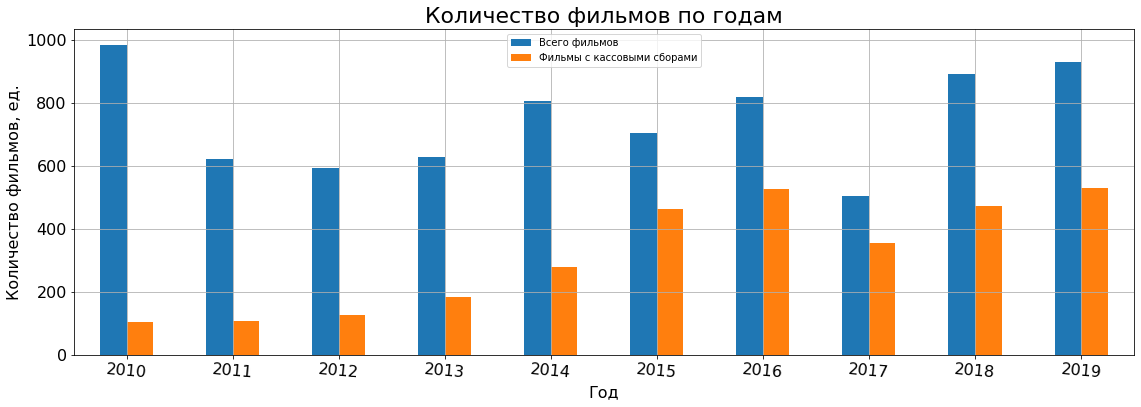

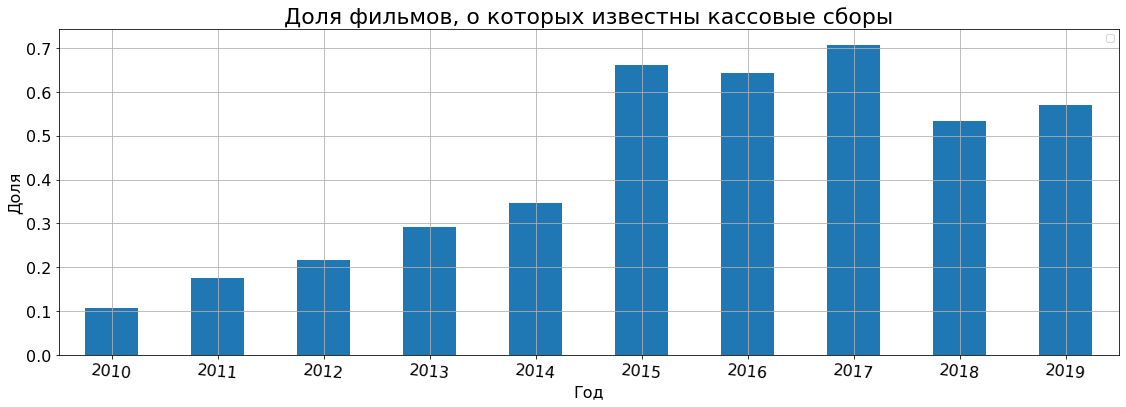

In [24]:
box_office_film = data.loc[data['box_office'].notna()]

df = pd.DataFrame()

df['total'] = data.pivot_table(index='year', values='title', aggfunc=('count'))['title']
df['box_office_film'] = box_office_film.pivot_table(index='year', values='title', aggfunc=('count'))
df['part_box_office_film'] = df['box_office_film']/df['total']
df


plotfunc(df,['total', 'box_office_film'],
         'bar',True,'Количество фильмов по годам',
         'Количество фильмов, ед.','Год',
         ['Всего фильмов', 'Фильмы с кассовыми сборами'],6)
plt.show()

plotfunc(df,['part_box_office_film'],'bar',
         False,'Доля фильмов, о которых известны кассовые сборы',
         'Доля','Год',[],6)
plt.show()

Из графиков можно предположить следующее:
1. Если рассматривать часть данных до 2015 года. Возможно в то время аналитика по кассовым сборам велась не достаточно чаятельно, соответственно информация о кассовых сборах практически нет. Однако с каждым годом % фильмов с кассовыми сборами растёт.
2. Вероятно датасет содержит не только фильмы для показа в кинотеатрах, но и фильмы только для телевидения, ютьюба и авторское кино.
3. Самым мало представленным годом является 2017, при этом доля кассовых сборов у этого года самая большая.
4. в 2018 и 2019 годах несмотря на скачек в общем количестве снятых фильмов, фильмов с кассовыми сборами стало чуть больше 50 %. Я думаю это связано с тем, что стали резко набирать популярность стриминговые сервисы такие как Нетфликс и Амазон.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда график и его оси подписаны 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

### Динамика проката по годам

Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

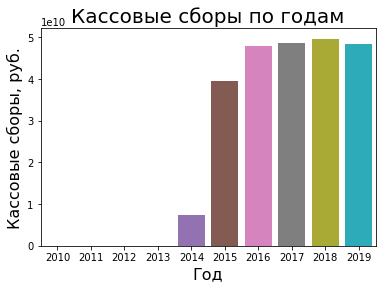

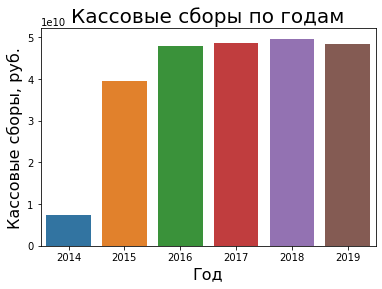

In [25]:
box_office_film = data.loc[data['box_office'].notna()]

pt = box_office_film.pivot_table(index='year', values='box_office', aggfunc=('sum'))
pt['year'] = pt.index

#Решила попробовать другой пакет, веселенькие цвета
diag = seaborn.barplot(y='box_office', x='year', data = pt)
diag.set_xlabel('Год', fontsize = 16)
diag.set_ylabel('Кассовые сборы, руб.', fontsize = 16)
diag.set_title('Кассовые сборы по годам', fontsize = 20)
diag;
plt.show()

pt = pt.loc[pt['year']>=2014]
diag = seaborn.barplot(y='box_office', x='year', data = pt)
diag.set_xlabel('Год', fontsize = 16)
diag.set_ylabel('Кассовые сборы, руб.', fontsize = 16)
diag.set_title('Кассовые сборы по годам', fontsize = 20)
diag;

Минимальная сумма сборов была в 2010 году, максимальная - 2018, однако я бы исключила из анализа по крайней мере первые 4 года, так как там очень маленькие суммы сбора (возможные причины такого феномена описывала в предыдущем пункте)

Из 2ого графика видно, что 2018 также является самым популярным для прокатных фильмов, динамика проката с каждым годом растёт и только 2019 год немного проигрывает в сборах и становится примерно ровна 2016 году. Как уже писала выше, я связываю это в нарастающей популярностью стриминговых сервисов и ютьб.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Если вдруг тебе понравилась тема визуализации, рекомендую посмотреть на библиотеку `plotly`.
    
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️</b> 
    
Спасибо, посмотрю.

</div>

### Среднее и медиана сборов по годам
С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

count         3158.00
mean      76478696.16
std      240353122.82
min              0.00
25%          86239.00
50%        2327987.55
75%       23979671.02
max     3073568690.79
Name: box_office, dtype: float64


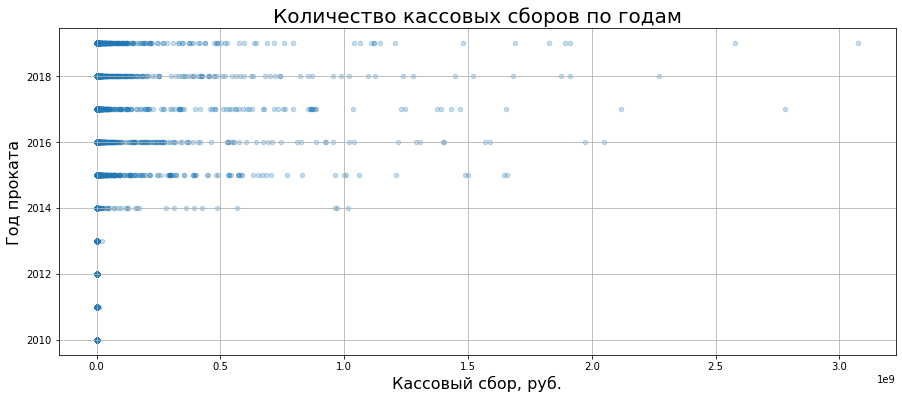

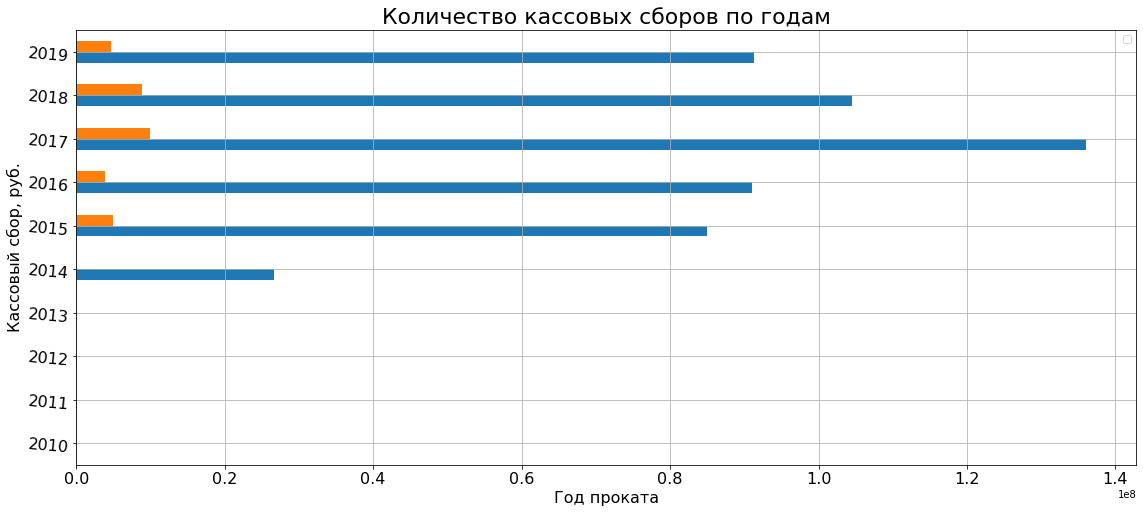

In [26]:
box_office_film = data.loc[data['box_office'].notna()]

print(box_office_film['box_office'].describe())





pt = box_office_film.pivot_table(index='year', values='box_office', aggfunc=('mean','median'))

fig = box_office_film.plot.scatter(x='box_office',y = 'year', alpha=0.25,figsize = (15,6),grid=True)
fig.set_xlabel('Кассовый сбор, руб.', fontsize = 16)
fig.set_ylabel('Год проката', fontsize = 16)
fig.set_title('Количество кассовых сборов по годам', fontsize = 20)
plt.show()

plotfunc(pt,['mean','median'],'barh',True,'Количество кассовых сборов по годам','Кассовый сбор, руб.','Год проката',[],8)
plt.show()

Из графика "Показатели кассовых сборов по годам" можно сделать предположение, что данные имеют много экстремальных значений(если позиции которые собрали меньше 1000. а есть которые собрали больше триллиона). Медиана и среднее значение очень сильно разнится. 

Предположение также подтверждается графиков "Количество кассовых сборов по годам" видно, что даже в самые популярные для проката года (2016-2019) подавляющее большинство фильмов собрали менее миллиона рублей.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, что увеличиваешь сами графики, ведь их так гораздо проще изучать.    
</div>

### Зависимость кассовых сборов от возрастных ограничений
Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

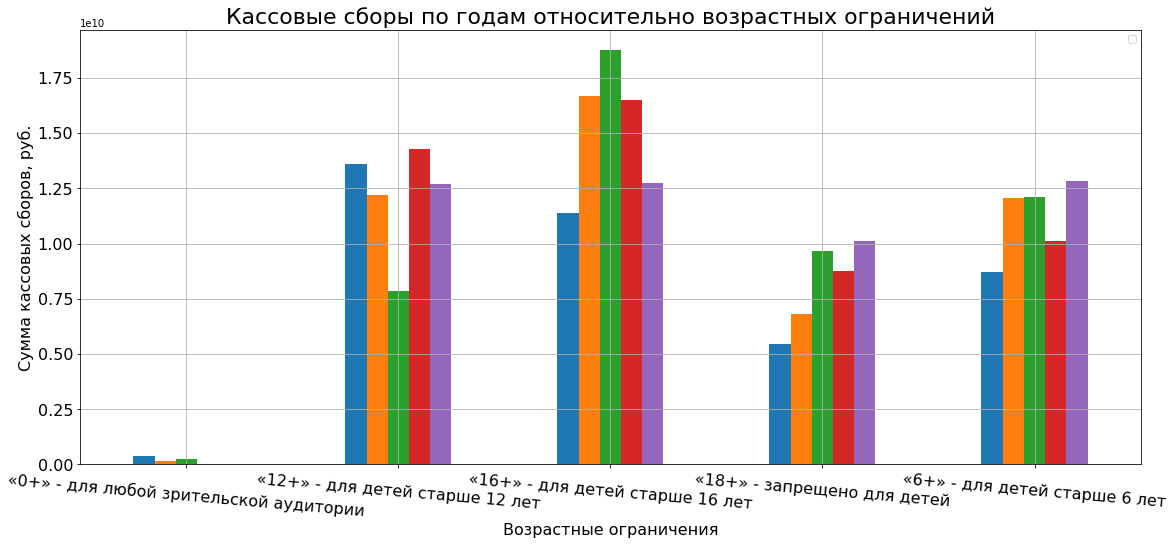

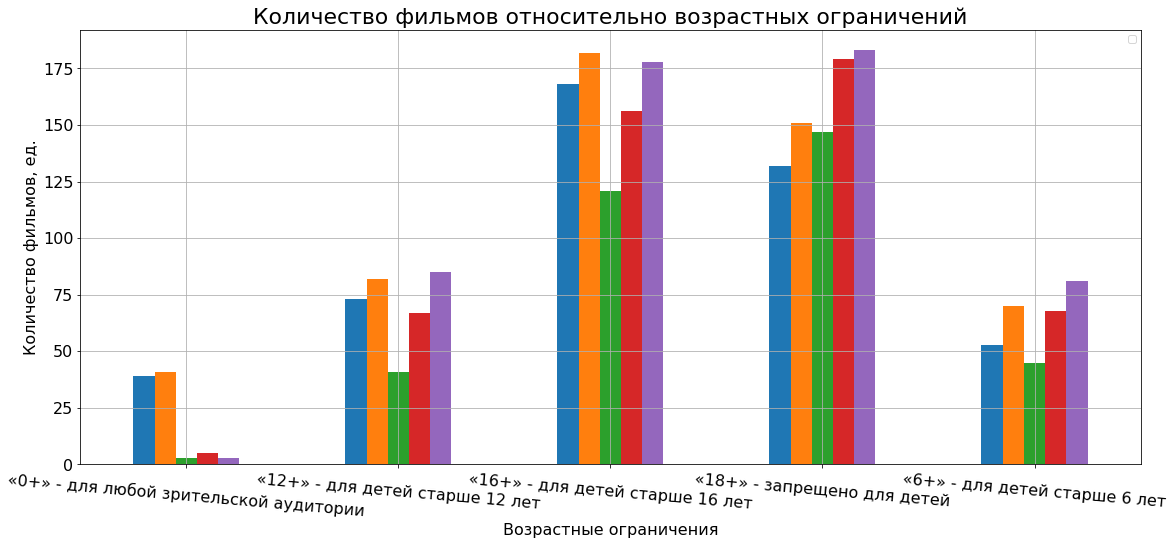

In [27]:
data_year_age_sum = pd.DataFrame()
data_year_age_count = pd.DataFrame()
years = data['year'].sort_values().unique()[5:]

for year in years:
    year = str(year)
    data_new = data.query('year=='+year)
    pt = data_new.pivot_table(index=['age_restriction'], values='box_office', aggfunc=('count','sum'))
    data_year_age_sum[year] = pt['sum']
    data_year_age_count[year] = pt['count']

    
plotfunc(data_year_age_sum,['2015','2016','2017','2018','2019'],
         'bar',True,'Кассовые сборы по годам относительно возрастных ограничений',
         'Сумма кассовых сборов, руб.','Возрастные ограничения',[],8)
plt.show();

plotfunc(data_year_age_count,['2015','2016','2017','2018','2019'],
         'bar',True,'Количество фильмов относительно возрастных ограничений',
         'Количество фильмов, ед.','Возрастные ограничения',[],8)
plt.show();


- Из графиков видно, что фильмы 0+ приносят меньше всего денег, видимо поэтому из количество с 2017 по 2019 год стало практически равно 0. Так как эта категория самая убыточная и самая малочисленная далее ее рассматривать не будем.  
- Фильмы 6+ и 12+ имеют примерно одинаковое количество фильмов по годам(+- 65 фильмов в год), выбивается только 2017 год (меньше 50), однако фильмы 6+ в 2017 году принесли много больше кассовых сборов, чем 12+.  
- Самые популярные и самые кассовые фильмы - это фильмы с ограничением +16. в 2017 году фильмы этой возрастной категории принесли самые большие кассовые сборы, хотя их количество было меньше чем в другие года.  
- Фильмы 16+ и 18+ снимают чаще, однако выгоднее, среди этих 2 категорий, снимать фильмы 16+.  
- В 2019 году несмотря на довольно разное количество снятых фильмов кассовые сборы для всех категорий практически одинаковы (кроме фильмов 18+, их хоть и очень много, кассовый сбор в них меньше других категорий).

максимальные кассовые сборы по годам:  
2015 - 12+  
2016 - 16+  
2017 - 16+  
2018 - 16+  
2019 - 16+

Какой-то четкой зависимости года и категории нет. Некоторые интересные наблюдения я обрисовала выше.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что некоторые графики у нас повторяются.
    
Это говорит о том, что мы можем создать функцию для постоянного их построения. И с помощью этого повысить оптимизацию своего кода и презентабельность проекта в целом.
    
То есть мы можем создать "обёртки" с методами, и в функцию будем подавать нужные перменные: 
    
- датасет
- подписи графика и осей
- и прочие любые настройки
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️</b> 
    
Сделала функцию для барплотов.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Супер 👍
    
</div>

## Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Фильмы с гос. поддрежкой. Бюджет и год выпуска фильма

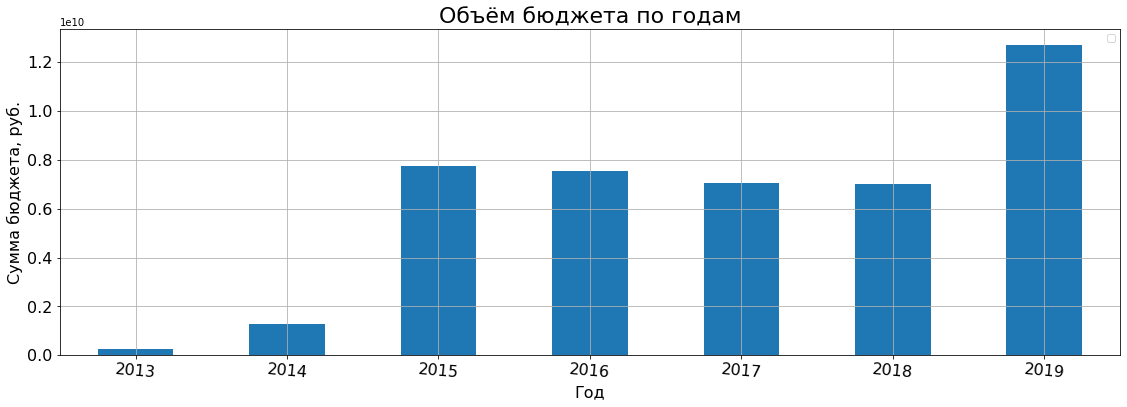

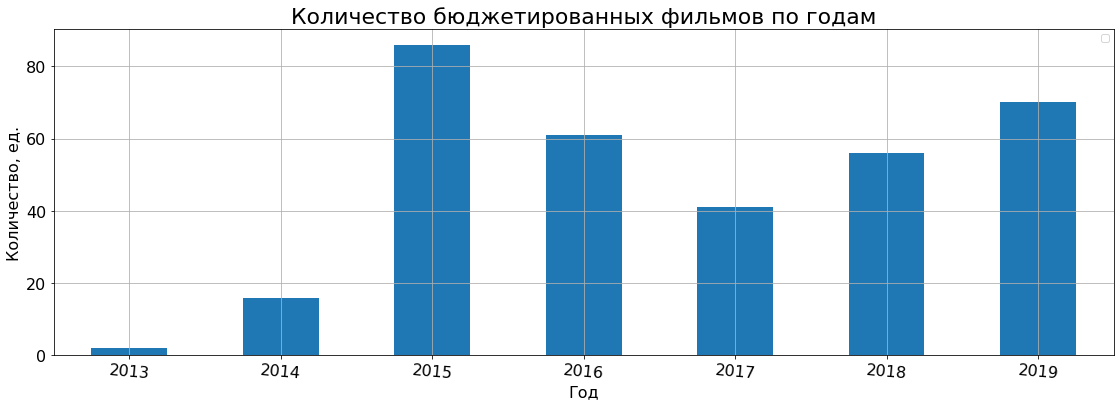

In [28]:
data_budget = data.loc[data['budget']>0].copy()

pt = data_budget.pivot_table(index='year', values='budget', aggfunc=('sum'))
plotfunc(pt,['budget'],'bar',True,
         'Объём бюджета по годам','Сумма бюджета, руб.','Год',[],6)
plt.show();

pt = data_budget.pivot_table(index='year', values='budget', aggfunc=('count'))
plotfunc(pt,['budget'],'bar',False,
         'Количество бюджетированных фильмов по годам','Количество, ед.','Год',[],6)
plt.show();

2013 и 2014 год имею один малы объём для анализа, поэтому считаю их можно исключить из анализа.  

Из графиков видно, что больше всего бюджеты было выделено в 2019 года. 2019 год был годом кино в России, я думаю это поспособствовало подъёму объемов снимаемых фильмов в 2018 году, а также на объемы гос поддержки в 2019. 

С 15 по 18 год было выделено примерно одинаковое количество бюджетов при этом количество фильмов, которые были сняты на эти деньги, с каждым годом уменьшалось, за исключением 2018 года (описала выше почему так). я описываю эту закономерность обесцениванием рубля (инфляция)

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Хорошим тоном считается показывать значения на графиках. 
    
Кстати это можно сделать с помощью:
    
- в бибилотеке `plotly` с помощью атрибута `text`, например в методе `px.bar`
- в библиотеке `matplotlib` <a href="https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples">первый пример</a>, <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html">второй пример</a> для группированных графиков
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️</b> 
    
Второй пример не подходит для нашей версии питона. нужна версия 3.4
А первый у меня ну никак не получился, как только я его не вертела, если не смложно, можешь показать пример на каком-то одном из графиков?

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Оставил небольшой пример ниже 😊
    
С отступами можно поиграться.
    
</div>

In [30]:
import matplotlib.pyplot as plt

In [37]:
pt = data_budget.pivot_table(index='year', values='budget', aggfunc=('sum')).reset_index()

In [48]:
pt['budget'] = pt['budget'] / 1_000_000

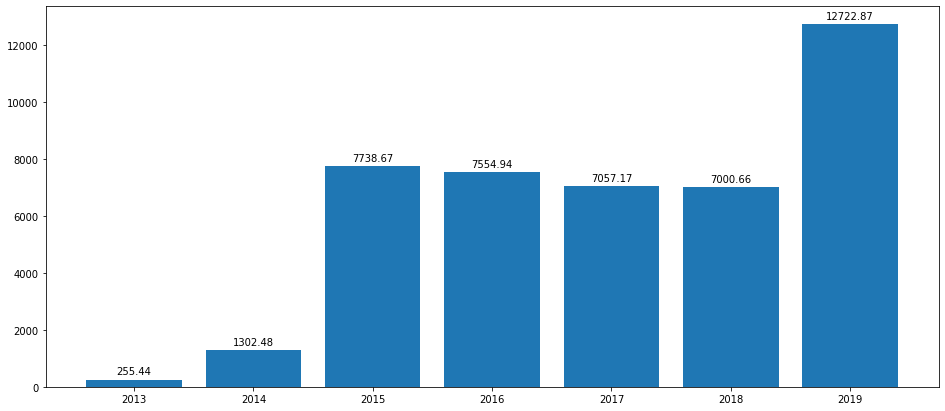

In [52]:
plt.figure(figsize=(16, 7))
plt.bar(pt['year'], pt['budget'])

for x,y in zip(pt['year'], pt['budget']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')
plt.show()

In [38]:
pt

,year,budget
0,2013,255435390
1,2014,1302484783
2,2015,7738669207
3,2016,7554942748
4,2017,7057172568
5,2018,7000664099
6,2019,12722866609


### Фильмы с гос. поддрежкой. Бюджет и возрастные ограничения

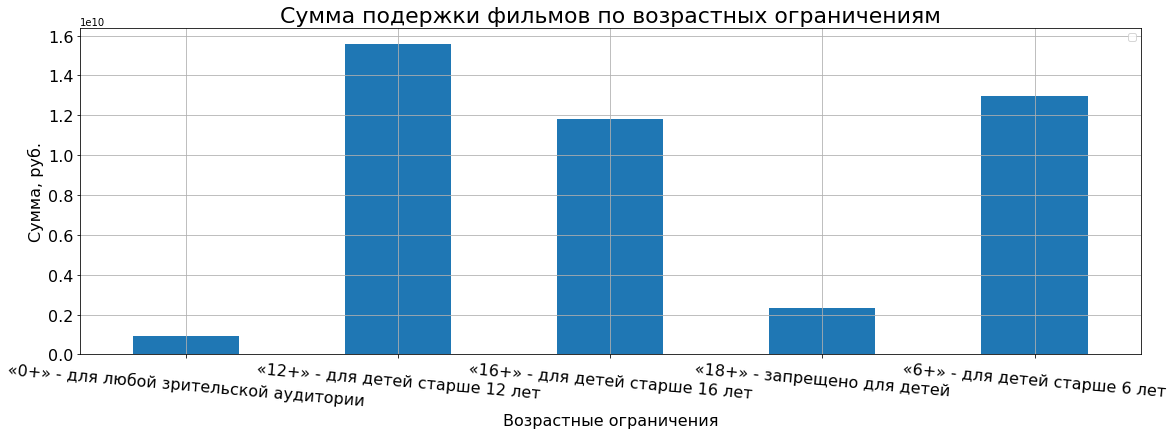

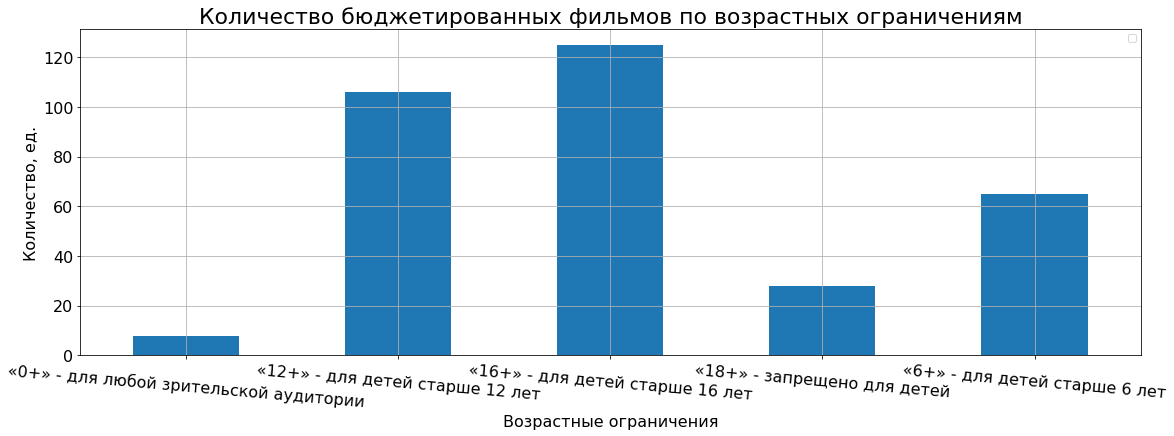

In [31]:
pt = data_budget.pivot_table(index='age_restriction', values='budget', aggfunc=('sum'))
plotfunc(pt,['budget'],'bar',False,
         'Сумма подержки фильмов по возрастных ограничениям',
         'Сумма, руб.','Возрастные ограничения',[],6)
plt.show();

pt = data_budget.pivot_table(index='age_restriction', values='budget', aggfunc=('count'))
plotfunc(pt,['budget'],'bar',False,
         'Количество бюджетированных фильмов по возрастных ограничениям',
         'Количество, ед.','Возрастные ограничения',[],6)
plt.show();

Из графиков видно, что чаще всего снимаются фильмы 16+, однако большие суммы на поддержку фильмов получают фильмы 12+. Фильмы 0+ снимаются крайне мало и получают соответствующую гос поддержку.  
Гос. поддержка мало выделяется для фильмов 18+

### Фильмы с гос поддрежкой. Бюджет и жанр 

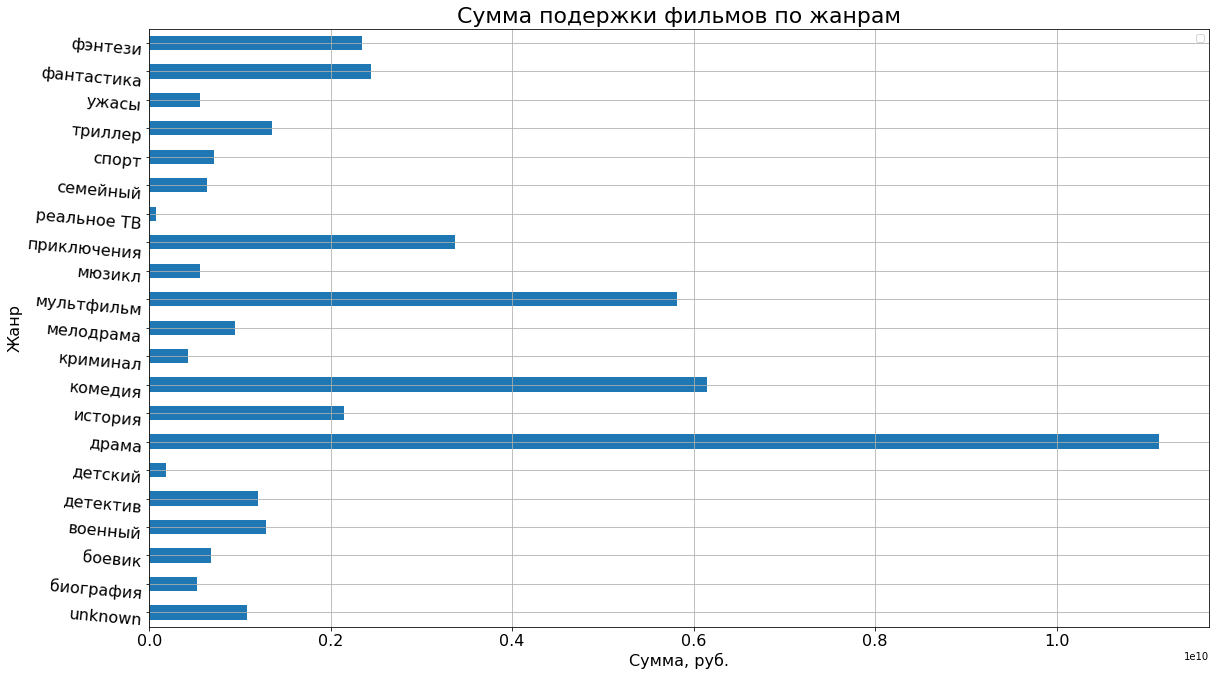

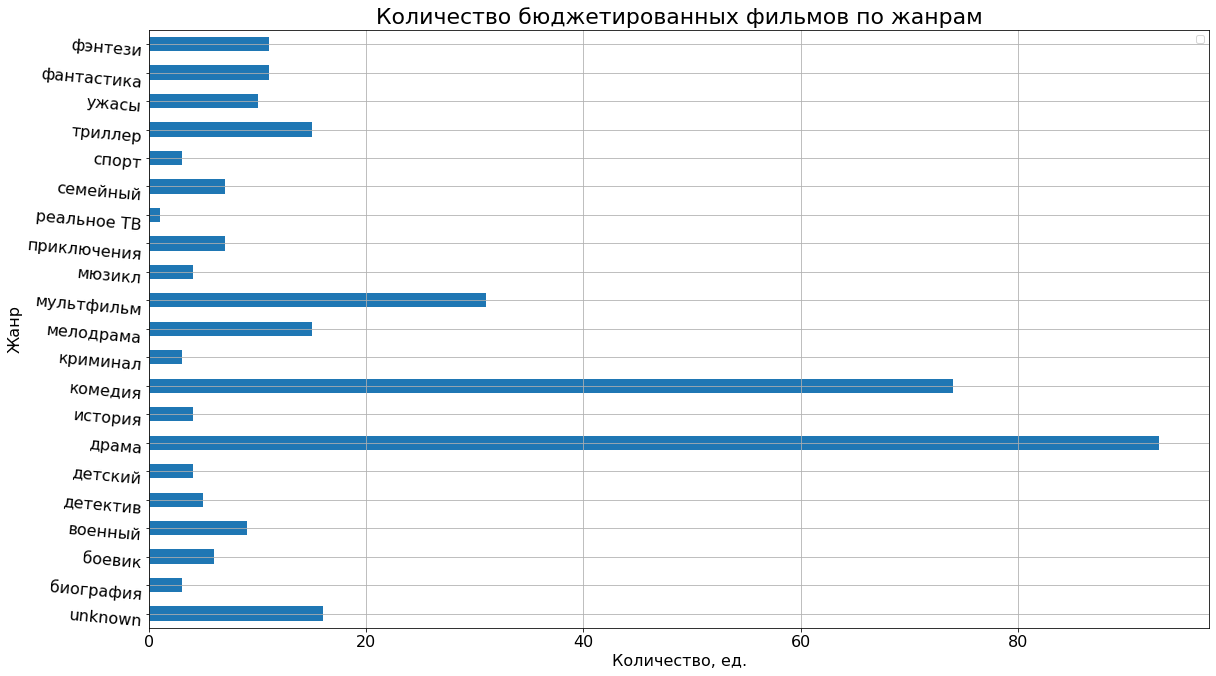

In [32]:
pt = data_budget.pivot_table(index='main_genres', values='budget', aggfunc=('sum'))
plotfunc(pt,['budget'],'barh',False,'Сумма подержки фильмов по жанрам',
         'Жанр','Сумма, руб.',[],11)
plt.show();

pt = data_budget.pivot_table(index='main_genres', values='budget', aggfunc=('count'))
plotfunc(pt,['budget'],'barh',False,
         'Количество бюджетированных фильмов по жанрам',
         'Жанр','Количество, ед.',[],11)
plt.show();

Из графиков видно, что больше всего денежных средств выделяется на фильмы в жанре драма, комедия и мультфильм. Этих фильмов и снято по количеству больше всего.

Самый не популярный жанр - Реальное ТВ

Также много средств выделяется на исторические и приключенческие фильмы, однако снято их меньше, следовательно можно сделать выводы, что это самые дорогие в производстве фильмы.

### Фильмы с гос поддрежкой. Бюджет и рейтинг

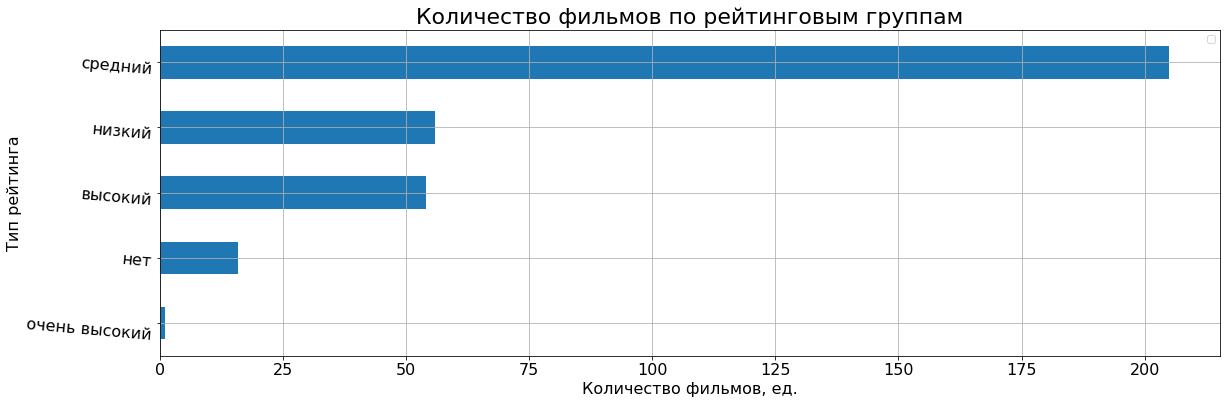

In [33]:
def ratings(ratings):
    if ratings == -1:
        return 'нет'
    elif (ratings > 0) and (ratings<=5):
        return 'низкий'
    elif (ratings > 5) and (ratings<=6.9):
        return 'средний'
    elif (ratings >= 7) and (ratings<=9):
        return 'высокий'
    else:
        return 'очень высокий'

data_budget['ratings_type'] = data_budget['ratings'].apply(ratings)


pt = data_budget.pivot_table(index='ratings_type', values='budget', aggfunc='count').sort_values(by='budget')

plotfunc(pt,['budget'],'barh',False,
         'Количество фильмов по рейтинговым группам',
         'Тип рейтинга','Количество фильмов, ед.',[],6)

plt.show();


Разделила все возможные рейтинги на 5 типов, меньше 5 баллов - низкий рейтинг, от 5 до 7 средний, от 7 до 9 - высокий и от 9 до 10 - очень высокий.  
При такой разделении получается, что подавляющие большинство бюджетированных фильмов имеет средний рейтинг. Хороший и низкий рейтинги получили примерно одинаковое количество фильмов. Всего 1 фильм получил очень высокую оценку зрителей. И у 16 фильмов нет никакого рейтинга, либо эти фильмы оценили очень малое количество зрителей, либо при выгрузке данных произошла ошибка и рейтинг о них потерялся.


Посмотрим разделение рейтингов относительно жанров:

Фильм с рейтингов "очень высокий" всего 1. и у него жанр "фантастика"
О 16 фильмах нет информации как о рейтинге, так и о жанре. 
Рассмотрим информацию о распределении жанров внутри оставшихся категорий рейтинга.

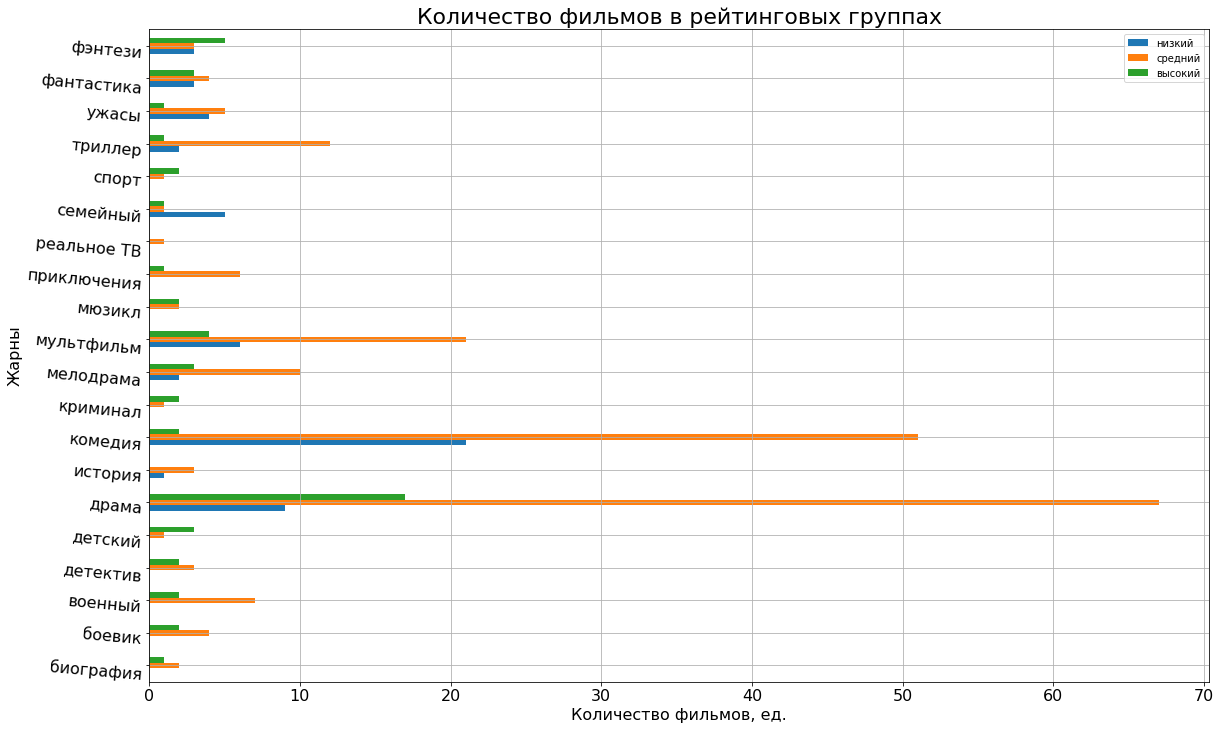

In [34]:
pt = data_budget.pivot_table(index=['ratings_type','main_genres'], values='title', aggfunc='count')

data_r_type_genre_count = pd.DataFrame(index=data_budget['main_genres'].sort_values().unique()[1:])

for r_type in ['низкий','средний','высокий']:
    data_new = pt[pt.index.get_level_values('ratings_type').isin([r_type])]
    data_new = data_new.reset_index(level = [0])
    data_r_type_genre_count[r_type] = data_new['title']

plotfunc(data_r_type_genre_count,['низкий','средний','высокий'],'barh',True,
         'Количество фильмов в рейтинговых группах',
         'Жарны','Количество фильмов, ед.',['низкий','средний','высокий'],12)    
plt.show();

- Из графика видно, что чаще всего низкий рейтинг имеют комедии, драмы и мультфильмы. Замечу, что многие жанры фильмов в принципе не имеют плохих оценок.  
- Средний рейтинг чаще всего имеют драмы (не удивительно, как выше выясняли, драмы снимают чаще всего), комедии, мультфильмы и триллеры.  
- Высокий рейтинг, кроме драм, имеют также фэнтэзи и фантастика фильмы, мультфильмы и мелодрамы.
- Фэнтэзи также жанр у которого высокие рейтинги преобладают над остальными. Также такое просматривается у фильмов с жанрами спорт, мюзикл, криминал и детский
- единственная категория в которой преобладают плохие оценки - семейный

## Общий вывод

Из имеющихся данных можно сделать следующие выводы:
1. Датасет имеет много неточностей относительно наименований и студия производства
2. Данные содержат много разных жанров и типов фильмов
3. В датасете подавляющее большинство фильмов не имеют информации о кассовых сборах. Этот вывод актуален относительно всех лет наблюдения
4. Для фильмов, о которых информация о кассовых сборах известна, видно, что с каждый год сборы увеличивались. Исключение составляет 2019 год. Я связываю падение кассовых сборов в этот год с нарастающей популярностью стриминговых сервисов
5. В датасете содержится информация о кассовых сборах не только супер популярных фильмов, но и тех, что были сняты, например, в СССР, поэтому имеют место сборы менее 1000 рублей, отсюда можно сделать вывод, что show_start_date - это вовсе не дата премьеры фильма, а дата выдачи прокатного удостоверения - ошибка в описании датасета
6. Самые популярные для просмотра в кинотеатре фильмы имеют возрастное ограничений 16+. Чаще всего снимают фильмы именно с таким рейтингом.
7. Фильмы с рейтингом 0+ самые не выгодные для производства, поэтому с 2017 года их почти не снимают.
Отдельный выводы можно сделать для фильмов с гос. поддержкой
1. больше всего бюджета для производства фильмов было выделено в 2019 году. Этот год был объявлен годом кино в России
2. Производство кино с каждый годом становится всё более затратным
3. Больше всего в гос средствах нуждались фильмы 12+, однако снимаются чаще фильмы с рейтингом 16+
4. Чаще всего гос. поддержку получают фильмы в жанре драма, комедия, мультфильм и приключения. Судя по отзывам драмы также популярны у зрителя, много высоких оценок, однако подавляющее большинство оценок средние.
Вообще, что касается типов оценок, то средняя оценка преобладает практически во всех категориях за исключением семейного кино, такое кино по большей части имеет низкие оценки
Высокая же оценка преобладает для жанров фэнтэзи, спорт, мюзикл, криминал и детский.

Возможно, стоит снимать побольше фильмов в жанрах Фантастика и фэнтэзи, они явно приходятся по душе зрителям. Комедии и драмы люди тоже смотрят с охотой, но хороших комедий явно не хватает.



PS. 
1. Недеюсь ошибок в русском языке будет не много
2. Старалась разнообразить диаграммы как могла, но столбики мне всё равно нравятся больше чем линии или точки -_-
3. Датасет странноватый. Жаль что нет реальной даты примьеры, это многое бы успртило.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet     
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> 
<b>Комментарий студента: ℹ️</b> 
    
Спасибо за ревью. 
Добавила некоторый тех функционал, надеюсь всё правильно.   
Там где есть вопросы написала коммент, поясни пожалуйста.

В остальном всё отлично.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и что сразу применяешь новые знания, ведь так они гораздо быстрее усвоятся в памяти. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>